In [1]:
%load_ext autoreload
%autoreload 2

%cd '..'

/dss/dsshome1/03/di93fup/polarization_reddit


In [2]:
import json
import networkx as nx

from load.utils import load_network, load_subreddits
from network.utils import filter_node, draw_network


In [3]:
YEAR = 2016


In [4]:
subreddits = load_subreddits()

dem_subreddits = set(subreddits[subreddits["party"] == "dem"]["subreddit"])
rep_subreddits = set(subreddits[subreddits["party"] == "rep"]["subreddit"])


In [5]:
network_weighted = load_network(year=2016, weighted=True)
all_subreddits_year = set(network_weighted.nodes())

dem_subreddits &= all_subreddits_year
rep_subreddits &= all_subreddits_year

print(len(dem_subreddits), len(rep_subreddits))


20 13


In [8]:
dem_network_weighted = nx.subgraph_view(
    network_weighted,
    filter_node=lambda node: filter_node(
        node,
        network=network_weighted,
        party_subreddits=dem_subreddits,
        opposition_subreddits=rep_subreddits,
        weighted=True,
    ),
)

rep_network_weighted = nx.subgraph_view(
    network_weighted,
    filter_node=lambda node: filter_node(
        node,
        network=network_weighted,
        party_subreddits=rep_subreddits,
        opposition_subreddits=dem_subreddits,
        weighted=True,
    ),
)


In [13]:
dem_subreddits_weighted = set(dem_network_weighted.nodes())

print("Democrat labeled subreddits", dem_subreddits)

print(
    "Democrat discovered subreddits",
    dem_subreddits_weighted - dem_subreddits,
)

print("Total", len(dem_subreddits_weighted))

with open('data/metadata/dem_subreddits_weighted.json', 'w', encoding='utf-8') as f:
    json.dump(list(dem_subreddits_weighted), f)

Democrat labeled subreddits {'ThanksObama', 'OurPresident', 'enoughsandersspam', 'StillSandersForPres', 'Political_Revolution', 'AskDemocrats', 'hillaryclinton', 'Kossacks_for_Sanders', 'SandersForPresident', 'askhillarysupporters', 'HillaryForAmerica', 'obama', 'WayOfTheBern', 'GrassrootsSelect', 'Reform_The_DNC', 'AskBernieSupporters', 'tulsi', 'BlueMidterm2018', 'democrats', 'TimCanova'}
Democrat discovered subreddits {'BasicIncome', 'FULLCOMMUNISM', 'GreenParty', 'EnoughLibertarianSpam', 'Anarchism', 'GunsAreCool', 'progressive', 'Liberal'}
Total 28


In [14]:
rep_subreddits_weighted = set(rep_network_weighted.nodes())

print("Republican labeled subreddits", rep_subreddits)

print(
    "Republican discovered subreddits",
    rep_subreddits_weighted - rep_subreddits,
)

print("Total", len(rep_subreddits_weighted))

with open('data/metadata/rep_subreddits_weighted.json', 'w', encoding='utf-8') as f:
    json.dump(list(rep_subreddits_weighted), f)

Republican labeled subreddits {'Marco_Rubio', 'donaldtrump', 'AskTrumpSupporters', 'republicans', 'trump', 'randpaul', 'RepublicansForSanders', 'TedCruzForPresident', 'AskThe_Donald', 'Republican', 'Vote_Trump', 'The_Donald', 'KasichForPresident'}
Republican discovered subreddits {'GoldandBlack', 'gunpolitics', 'The_Farage', 'Shitstatistssay', 'The_Europe', 'AgainstHateSubreddits', 'SargonofAkkad', 'conservatives', 'Le_Pen', 'Israel', 'DebateAltRight', 'WhiteRights', 'altright', 'DebateFascism', 'RightwingLGBT'}
Total 28


In [15]:
network_unweighted = load_network(year=2016, weighted=False)

dem_network_unweighted = nx.subgraph_view(
    network_unweighted,
    filter_node=lambda node: filter_node(
        node,
        network=network_unweighted,
        party_subreddits=dem_subreddits,
        opposition_subreddits=rep_subreddits,
        weighted=False,
    ),
)

rep_network_unweighted = nx.subgraph_view(
    network_unweighted,
    filter_node=lambda node: filter_node(
        node,
        network=network_unweighted,
        party_subreddits=rep_subreddits,
        opposition_subreddits=dem_subreddits,
        weighted=False,
    ),
)


In [16]:
dem_subreddits_unweighted = set(dem_network_unweighted.nodes())

print("Democrat labeled subreddits", dem_subreddits)

print(
    "Democrat discovered subreddits",
    dem_subreddits_unweighted - dem_subreddits,
)

print("Total", len(dem_subreddits_unweighted))

with open('data/metadata/dem_subreddits_unweighted.json', 'w', encoding='utf-8') as f:
    json.dump(list(dem_subreddits_unweighted), f)


Democrat labeled subreddits {'ThanksObama', 'OurPresident', 'enoughsandersspam', 'StillSandersForPres', 'Political_Revolution', 'AskDemocrats', 'hillaryclinton', 'Kossacks_for_Sanders', 'SandersForPresident', 'askhillarysupporters', 'HillaryForAmerica', 'obama', 'WayOfTheBern', 'GrassrootsSelect', 'Reform_The_DNC', 'AskBernieSupporters', 'tulsi', 'BlueMidterm2018', 'democrats', 'TimCanova'}
Democrat discovered subreddits {'EnoughTrumpSpam', 'POLITIC', 'PoliticalDiscussion', 'AprogressiveParty', 'EndFPTP', 'GreenParty', 'TheRecordCorrected', 'Liberal', 'RiseUPP', 'Our_Politics', 'politicalfactchecking', 'jillstein', 'DNCleaks', 'badeconomics', 'progressive', 'altnewz', 'Enough_Sanders_Spam', 'Fuckthealtright', 'FreePolDiscussion', 'CAVDEF', 'PoliticalHumor', 'GunsAreCool', 'unfilter', 'scotus', 'uspolitics'}
Total 45


In [17]:
rep_subreddits_unweighted = set(rep_network_unweighted.nodes())

print("Republican labeled subreddits", rep_subreddits)

print(
    "Republican discovered subreddits",
    rep_subreddits_unweighted - rep_subreddits,
)

print("Total", len(rep_subreddits_unweighted))

with open('data/metadata/rep_subreddits_unweighted.json', 'w', encoding='utf-8') as f:
    json.dump(list(rep_subreddits_unweighted), f)


Republican labeled subreddits {'Marco_Rubio', 'donaldtrump', 'AskTrumpSupporters', 'republicans', 'trump', 'randpaul', 'RepublicansForSanders', 'TedCruzForPresident', 'AskThe_Donald', 'Republican', 'Vote_Trump', 'The_Donald', 'KasichForPresident'}
Republican discovered subreddits {'restorethefourth', 'BernieSandersSucks', 'europeannationalism', 'CatholicPolitics', 'The_Europe', 'DescentIntoTyranny', 'GaryJohnson', 'Anarcho_Capitalism', 'Hillary', 'austrian_economics', 'tytonreddit', 'PoliticalVideo', 'prolife', 'DarkEnlightenment', 'Shitstatistssay', '2016_elections', 'WikiInAction', 'Conservative', 'NeverTrump', 'conservatives', 'BannedFromThe_Donald', 'InternationalNews', 'moderatepolitics', 'Libertarian', 'ConservativesOnly', 'The_Farage', 'SargonofAkkad', 'Drumpf', 'Le_Pen', 'progun', 'WhiteRights', 'altright', 'ConservativeMeta', 'RightwingLGBT', 'ronpaul', 'libertarianmeme', 'holocaust', 'ShitRConservativeSays', 'Sorosforprison', 'askaconservative'}
Total 53


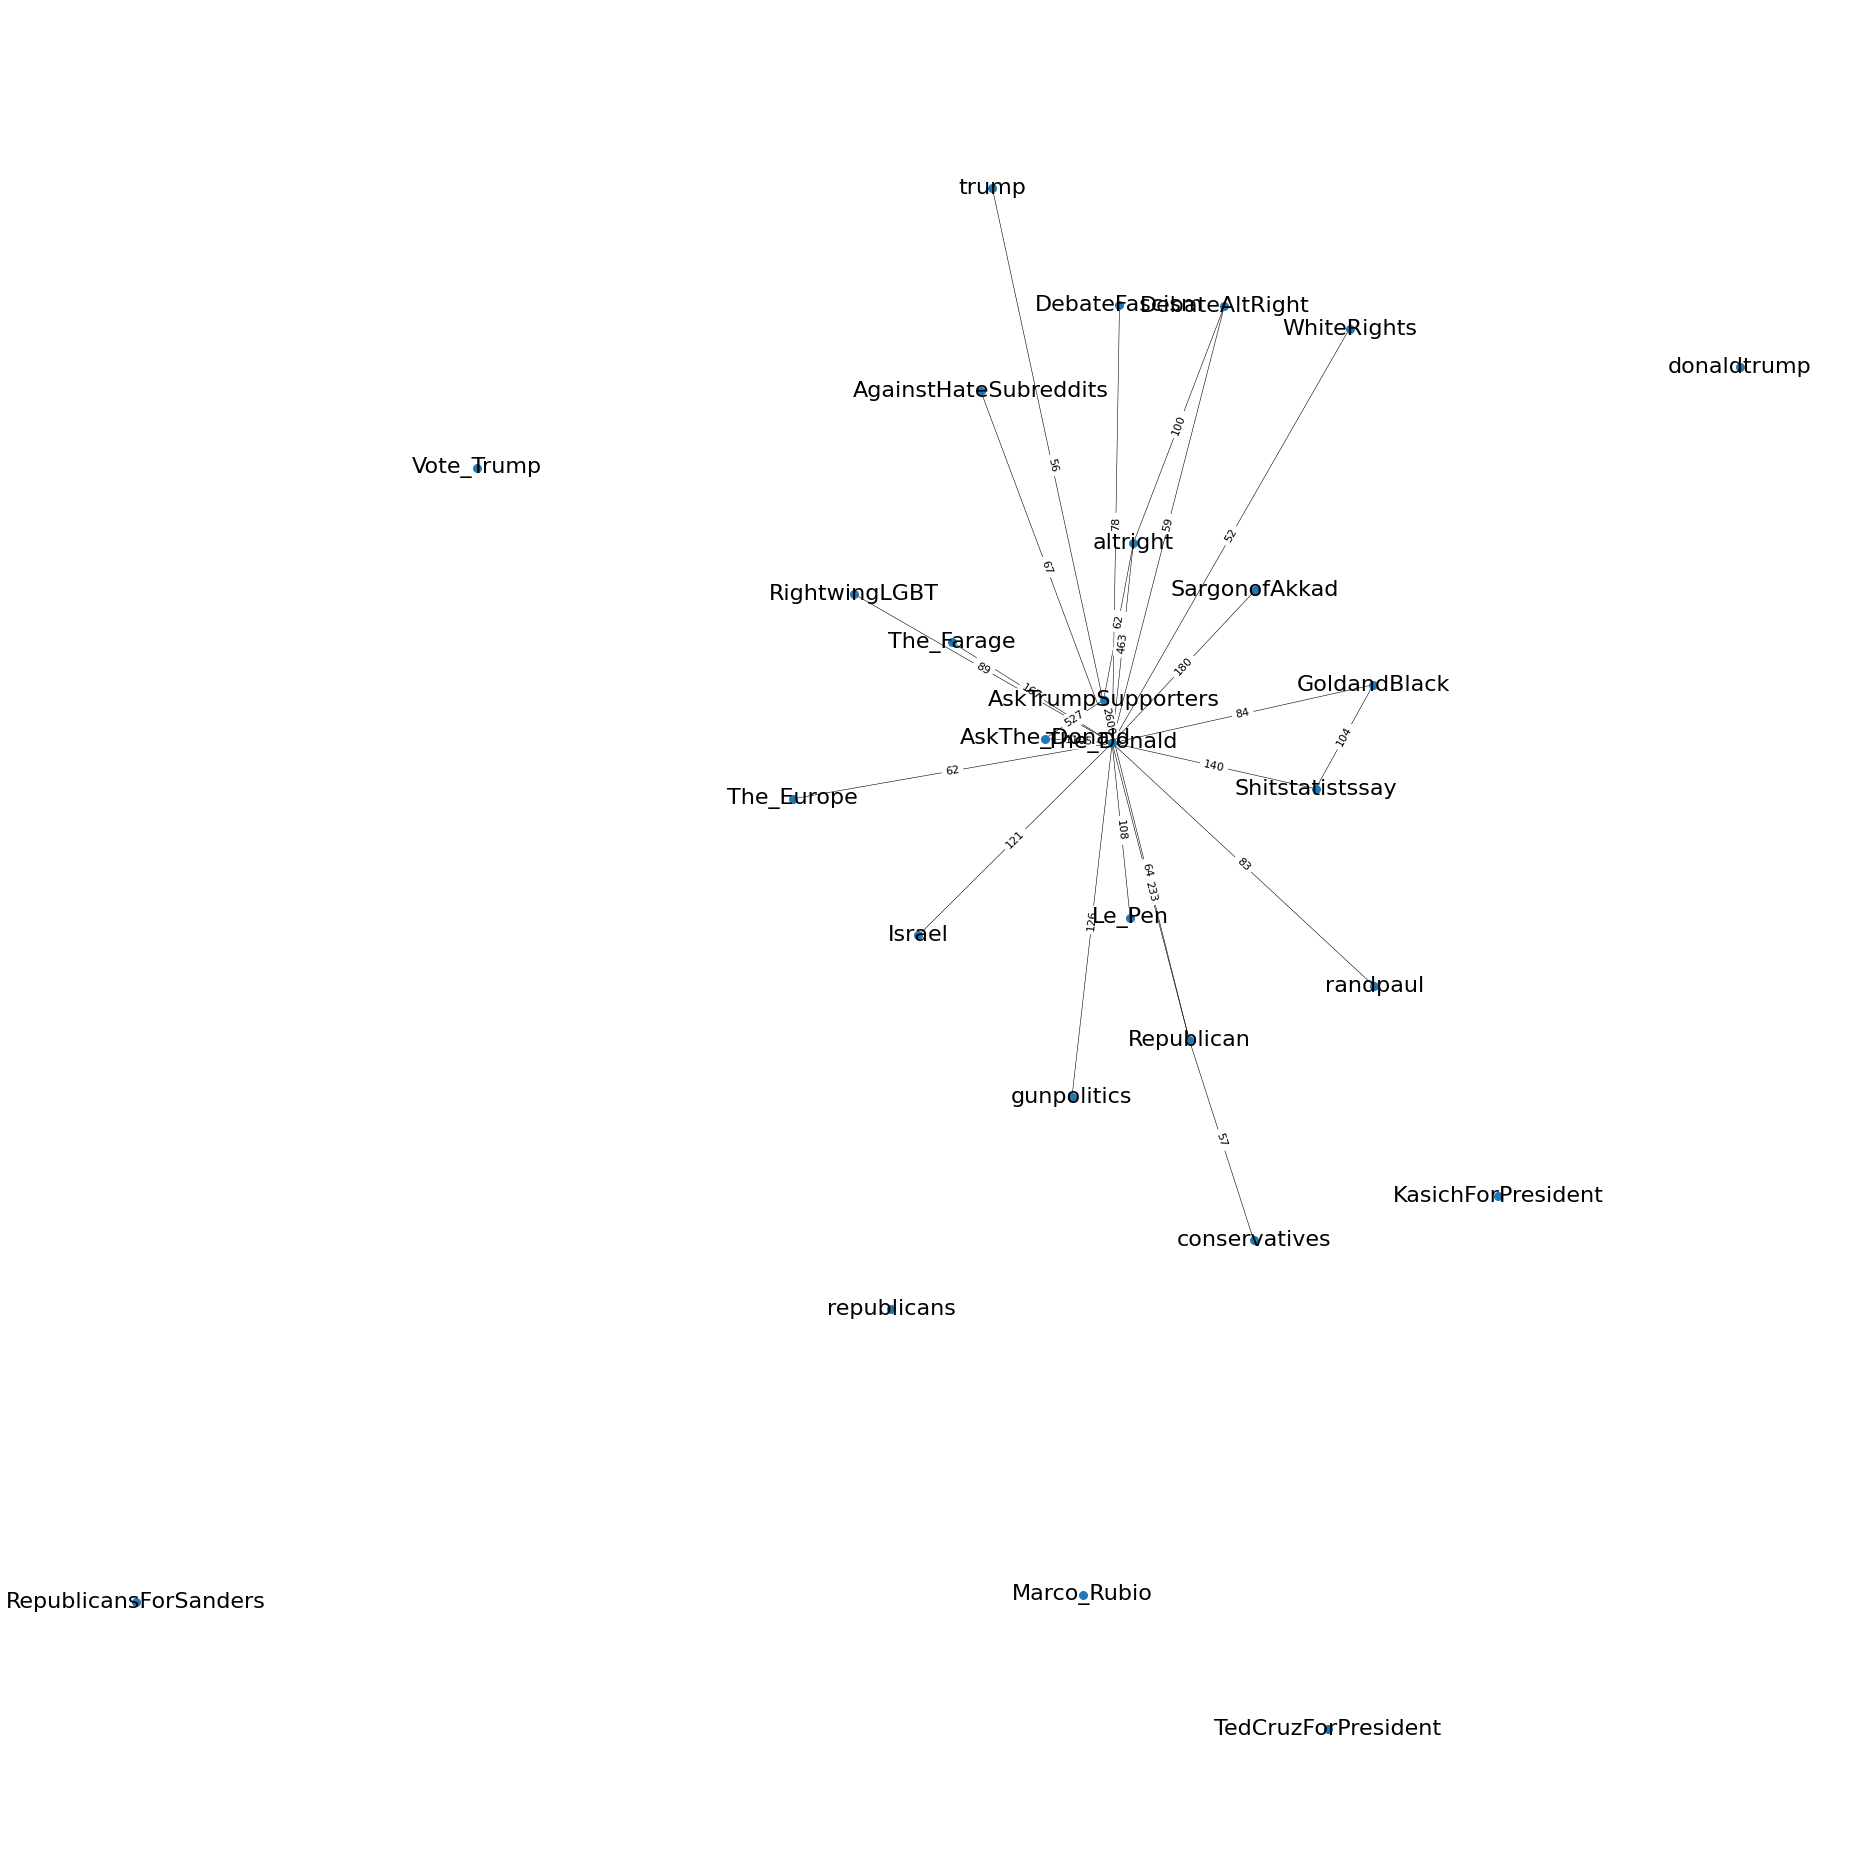

In [18]:
draw_network(rep_network_weighted, weighted=True)

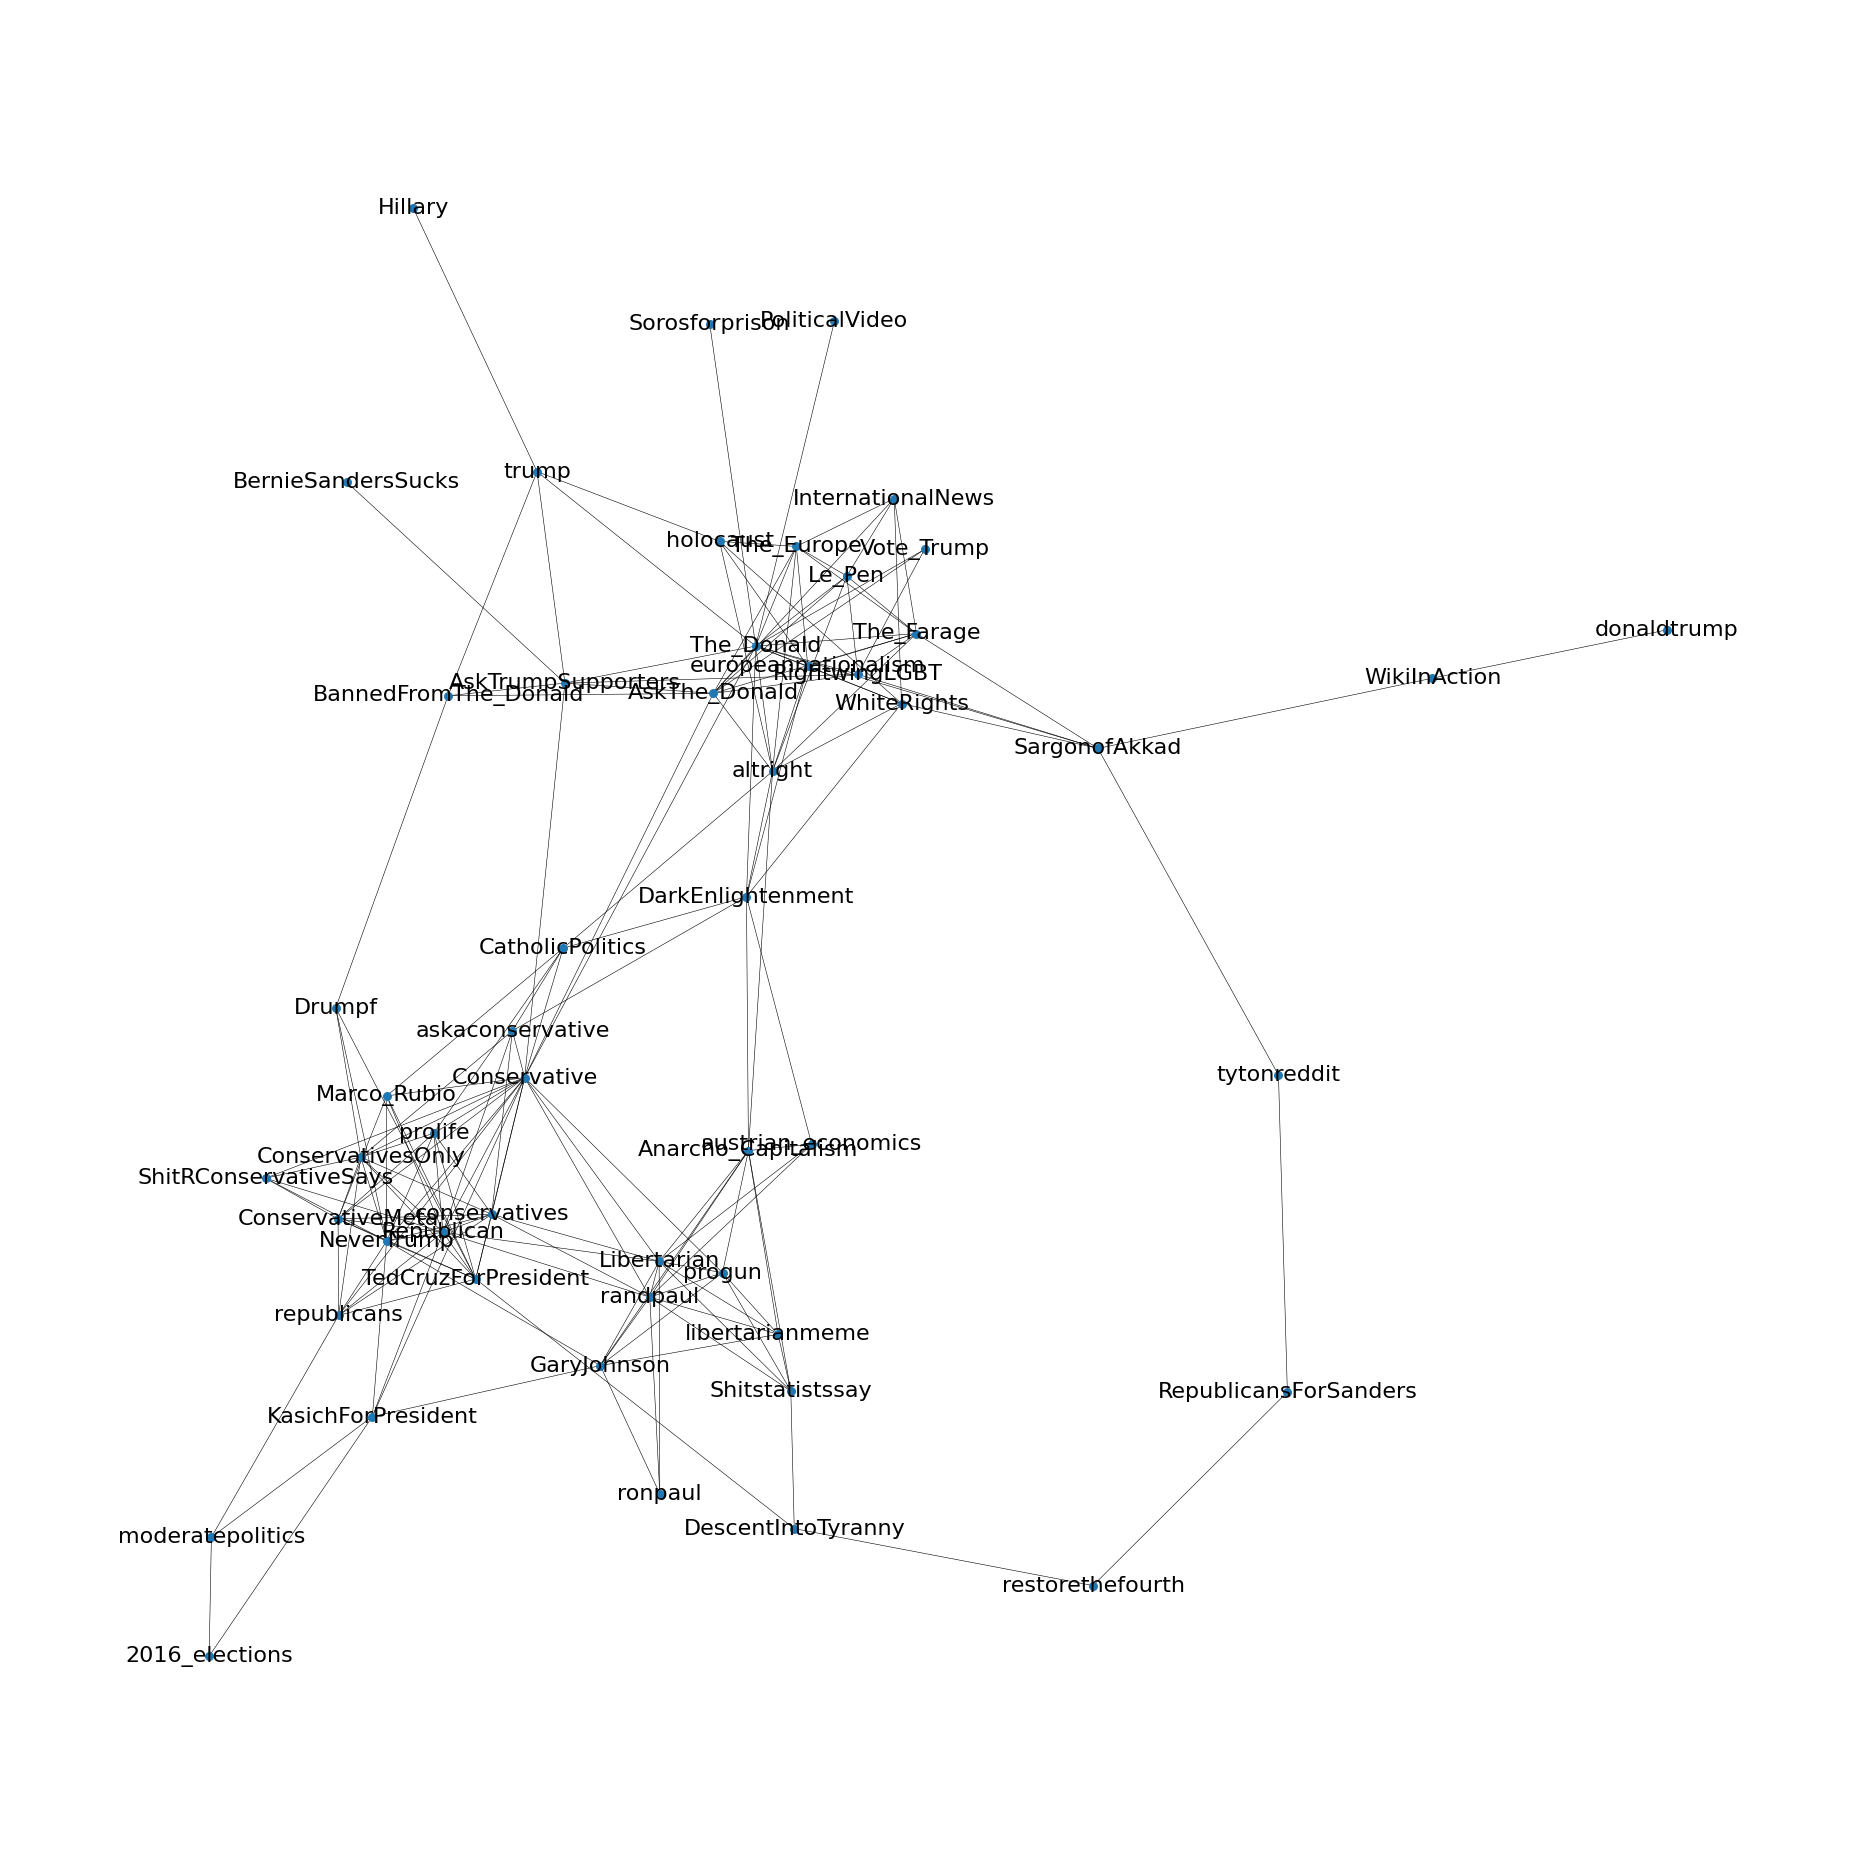

In [19]:
draw_network(rep_network_unweighted, weighted=False)

